In [1]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the dataset
air = pd.read_csv("airline-passengers.csv")
air

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [3]:
#shape of the dataframe
air.shape

(144, 2)

In [4]:
air.describe()#description of the dataframe

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [5]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [6]:
air.dtypes #datatypes of the dataframe

Month         object
Passengers     int64
dtype: object

In [7]:
air.isnull().sum() #finding if any null values are present and sum of total

Month         0
Passengers    0
dtype: int64

(array([[63., 62., 19.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  8., 32., 29., 19., 24., 17.,  8.,  5.,  2.]]),
 array([0.0, 62.2, 124.4, 186.60000000000002, 248.8, 311.0,
        373.20000000000005, 435.40000000000003, 497.6, 559.8000000000001,
        622.0], dtype=object),
 <a list of 2 BarContainer objects>)

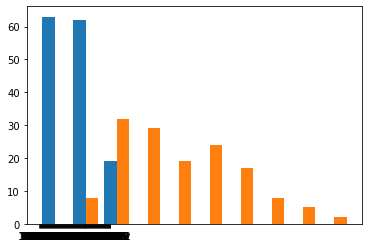

In [8]:
plt.hist(air) #plotting a histogram

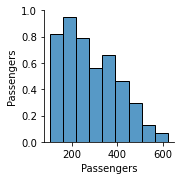

In [9]:
sns.pairplot(air) #plotting a pairplot

In [10]:
air.set_index('Month',inplace=True)
# making the month column as index

In [11]:
air

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
...,...
1960-08,606
1960-09,508
1960-10,461


In [12]:
from pandas import Grouper
from pandas import DataFrame

In [13]:
air[air.duplicated()].shape

(26, 1)

In [14]:
air.drop_duplicates(inplace=True)

In [15]:
air

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
...,...
1960-07,622
1960-08,606
1960-09,508


In [16]:
air.shape

(118, 1)

In [17]:
air[air.duplicated()].shape

(0, 1)

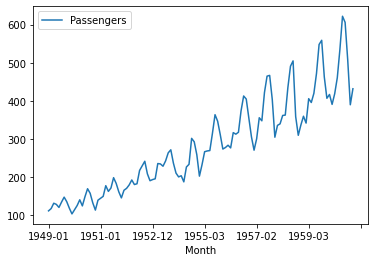

In [18]:
air.plot()
plt.show()#the data is multiplicative and showig upwards in pattern

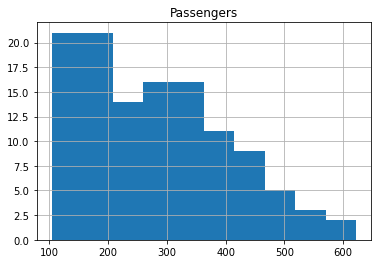

In [19]:
air.hist()
plt.show()#histogram 

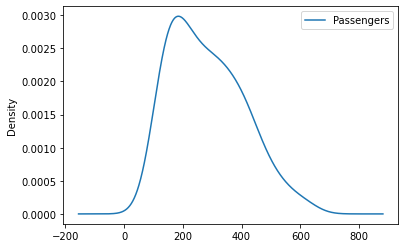

In [20]:
air.plot(kind='kde')
plt.show()#density plot 

In [21]:
from sklearn.metrics import mean_squared_error
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf


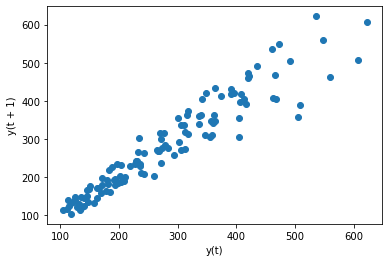

In [22]:
#Lag_plot
lag_plot(air)
plt.show()

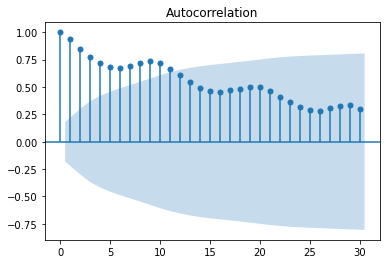

In [23]:
plot_acf(air,lags=30)
plt.show()#autocorrelation plot

<AxesSubplot:xlabel='Month', ylabel='Month'>

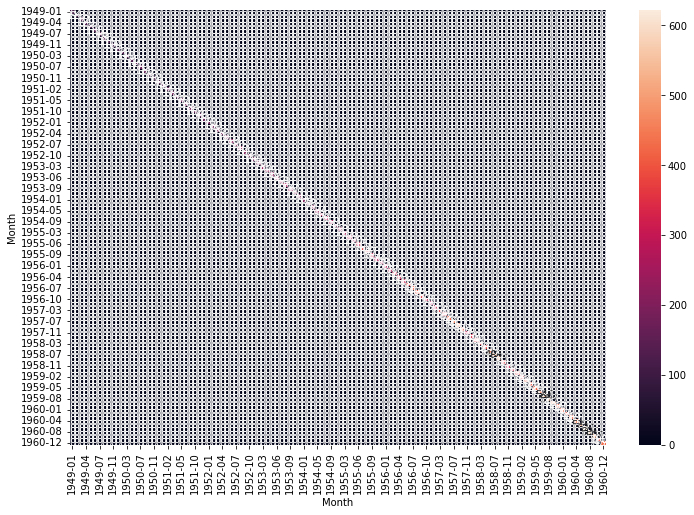

In [24]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=air,values="Passengers",index="Month",columns="Month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values


# Upsampling

In [27]:
air.index = pd.to_datetime(air.index)

In [28]:
upsampled = air.resample('M').mean()
print(upsampled.head(32))

            Passengers
Month                 
1949-01-31       112.0
1949-02-28       118.0
1949-03-31       132.0
1949-04-30       129.0
1949-05-31       121.0
1949-06-30       135.0
1949-07-31       148.0
1949-08-31         NaN
1949-09-30       136.0
1949-10-31       119.0
1949-11-30       104.0
1949-12-31         NaN
1950-01-31       115.0
1950-02-28       126.0
1950-03-31       141.0
1950-04-30         NaN
1950-05-31       125.0
1950-06-30       149.0
1950-07-31       170.0
1950-08-31         NaN
1950-09-30       158.0
1950-10-31       133.0
1950-11-30       114.0
1950-12-31       140.0
1951-01-31       145.0
1951-02-28       150.0
1951-03-31       178.0
1951-04-30       163.0
1951-05-31       172.0
1951-06-30         NaN
1951-07-31       199.0
1951-08-31         NaN


            Passengers
Month                 
1949-01-31       112.0
1949-02-28       118.0
1949-03-31       132.0
1949-04-30       129.0
1949-05-31       121.0
1949-06-30       135.0
1949-07-31       148.0
1949-08-31       142.0
1949-09-30       136.0
1949-10-31       119.0
1949-11-30       104.0
1949-12-31       109.5
1950-01-31       115.0
1950-02-28       126.0
1950-03-31       141.0


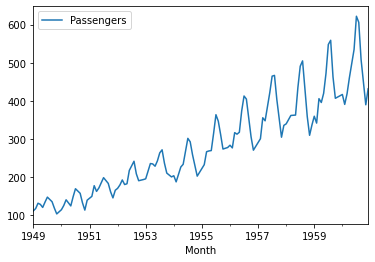

In [29]:
interpolated = upsampled.interpolate(method='linear') ## interplation was done for nan values which we get after doing upsampling by month
print(interpolated.head(15))
interpolated.plot()
plt.show()

In [30]:
interpolated

,Passengers
Month,
1949-01-31,112.0
1949-02-28,118.0
1949-03-31,132.0
1949-04-30,129.0
1949-05-31,121.0
...,...
1960-08-31,606.0
1960-09-30,508.0
1960-10-31,449.0


In [31]:
Train = interpolated.head(119)
Test = interpolated.tail(25)

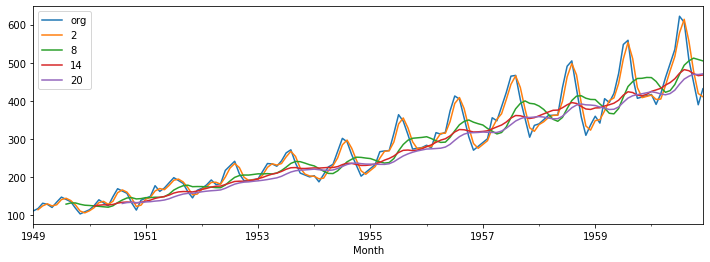

In [33]:
#moving average
plt.figure(figsize=(12,4))
interpolated.Passengers.plot(label="org")
for i in range(2,24,6):
    interpolated["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose

C:\Users\MURALI~1\AppData\Local\Temp/ipykernel_4872/4009463752.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decompose_ts_add = seasonal_decompose(interpolated.Passengers,freq=12)


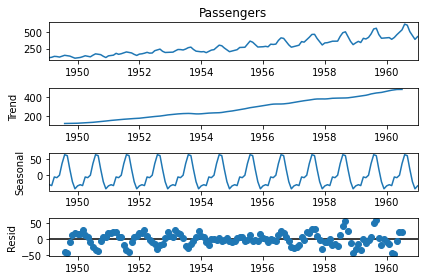

In [36]:
#Time Series Decomposition plot
decompose_ts_add = seasonal_decompose(interpolated.Passengers,freq=12)  
decompose_ts_add.plot()
plt.show()

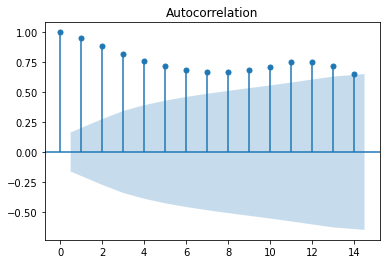

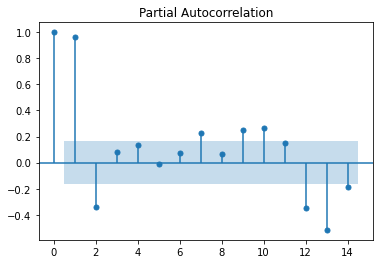

In [37]:
#ACF AND PACF plots
import statsmodels.graphics.tsaplots as tsa_plots

tsa_plots.plot_acf(interpolated.Passengers,lags=14)
tsa_plots.plot_pacf(interpolated.Passengers,lags=14)
plt.show()

In [39]:
#Evaluation metric MAPE
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [41]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [42]:
#SIMPLE EXPONENTIAL METHOD
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Passengers)

C:\Users\Muralidhar\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Muralidhar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


14.25207871551297

In [43]:
# Holt method 
hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.1, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Passengers)

C:\Users\MURALI~1\AppData\Local\Temp/ipykernel_4872/2337225878.py:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.1, smoothing_slope=0.2)


11.395192872469732

In [45]:
#Holts winter exponential smoothing with additive seasonality and additive trend

In [46]:
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.2) #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers)

C:\Users\MURALI~1\AppData\Local\Temp/ipykernel_4872/3047529225.py:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.2) #add the trend to the model


9.2477420988705

In [47]:
#Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [48]:
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.2) 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Passengers)

C:\Users\MURALI~1\AppData\Local\Temp/ipykernel_4872/2440570425.py:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.2)


8.973950942007342

In [50]:
from numpy import sqrt

In [51]:
rmse_hwe_mul_add = sqrt(mean_squared_error(pred_hwe_mul_add,Test.Passengers))
rmse_hwe_mul_add

51.11641346827738

In [52]:
#Final Model by combining train and test
hwe_model_add_add = ExponentialSmoothing(interpolated["Passengers"],seasonal="add",trend="add",seasonal_periods=10).fit()

C:\Users\Muralidhar\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [53]:
#Forecasting for next 10 time periods
hwe_model_add_add.forecast(10)

C:\Users\Muralidhar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1961-01-31    436.690010
1961-02-28    445.716193
1961-03-31    451.647894
1961-04-30    452.830397
1961-05-31    452.633177
1961-06-30    446.523158
1961-07-31    444.331973
1961-08-31    442.063554
1961-09-30    447.397899
1961-10-31    456.815074
Freq: M, dtype: float64

In [54]:
interpolated

,Passengers
Month,
1949-01-31,112.0
1949-02-28,118.0
1949-03-31,132.0
1949-04-30,129.0
1949-05-31,121.0
...,...
1960-08-31,606.0
1960-09-30,508.0
1960-10-31,449.0


In [55]:
interpolated.reset_index(inplace=True)

In [57]:
interpolated['t'] = 1

In [59]:
interpolated

,Month,Passengers,t
0,1949-01-31,112.0,1
1,1949-02-28,118.0,1
2,1949-03-31,132.0,1
3,1949-04-30,129.0,1
4,1949-05-31,121.0,1
...,...,...,...
139,1960-08-31,606.0,1
140,1960-09-30,508.0,1
141,1960-10-31,449.0,1
142,1960-11-30,390.0,1


In [60]:
for i,row in interpolated.iterrows():
  interpolated['t'].iloc[i] = i+1

C:\Users\Muralidhar\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [61]:
interpolated

,Month,Passengers,t
0,1949-01-31,112.0,1
1,1949-02-28,118.0,2
2,1949-03-31,132.0,3
3,1949-04-30,129.0,4
4,1949-05-31,121.0,5
...,...,...,...
139,1960-08-31,606.0,140
140,1960-09-30,508.0,141
141,1960-10-31,449.0,142
142,1960-11-30,390.0,143


In [62]:
interpolated['t_sq'] = (interpolated['t'])**2
## inserted t_sq column with values

In [63]:
interpolated

,Month,Passengers,t,t_sq
0,1949-01-31,112.0,1,1
1,1949-02-28,118.0,2,4
2,1949-03-31,132.0,3,9
3,1949-04-30,129.0,4,16
4,1949-05-31,121.0,5,25
...,...,...,...,...
139,1960-08-31,606.0,140,19600
140,1960-09-30,508.0,141,19881
141,1960-10-31,449.0,142,20164
142,1960-11-30,390.0,143,20449


In [64]:
interpolated["month"] = interpolated.Month.dt.strftime("%b") # month extraction
interpolated["year"] = interpolated.Month.dt.strftime("%Y") # month extraction

In [65]:
interpolated

,Month,Passengers,t,t_sq,month,year
0,1949-01-31,112.0,1,1,Jan,1949
1,1949-02-28,118.0,2,4,Feb,1949
2,1949-03-31,132.0,3,9,Mar,1949
3,1949-04-30,129.0,4,16,Apr,1949
4,1949-05-31,121.0,5,25,May,1949
...,...,...,...,...,...,...
139,1960-08-31,606.0,140,19600,Aug,1960
140,1960-09-30,508.0,141,19881,Sep,1960
141,1960-10-31,449.0,142,20164,Oct,1960
142,1960-11-30,390.0,143,20449,Nov,1960


In [66]:
months = pd.get_dummies(interpolated['month']) ## converting the dummy variables for month column

In [67]:
months

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
139,0,1,0,0,0,0,0,0,0,0,0,0
140,0,0,0,0,0,0,0,0,0,0,0,1
141,0,0,0,0,0,0,0,0,0,0,1,0
142,0,0,0,0,0,0,0,0,0,1,0,0


In [68]:
months = months[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]

In [69]:
months

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
139,0,0,0,0,0,0,0,1,0,0,0,0
140,0,0,0,0,0,0,0,0,1,0,0,0
141,0,0,0,0,0,0,0,0,0,1,0,0
142,0,0,0,0,0,0,0,0,0,0,1,0


In [70]:
Airlines = pd.concat([interpolated,months],axis=1)

In [71]:
Airlines

,Month,Passengers,t,t_sq,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1949-01-31,112.0,1,1,Jan,1949,1,0,0,0,0,0,0,0,0,0,0,0
1,1949-02-28,118.0,2,4,Feb,1949,0,1,0,0,0,0,0,0,0,0,0,0
2,1949-03-31,132.0,3,9,Mar,1949,0,0,1,0,0,0,0,0,0,0,0,0
3,1949-04-30,129.0,4,16,Apr,1949,0,0,0,1,0,0,0,0,0,0,0,0
4,1949-05-31,121.0,5,25,May,1949,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,1960-08-31,606.0,140,19600,Aug,1960,0,0,0,0,0,0,0,1,0,0,0,0
140,1960-09-30,508.0,141,19881,Sep,1960,0,0,0,0,0,0,0,0,1,0,0,0
141,1960-10-31,449.0,142,20164,Oct,1960,0,0,0,0,0,0,0,0,0,1,0,0
142,1960-11-30,390.0,143,20449,Nov,1960,0,0,0,0,0,0,0,0,0,0,1,0


In [72]:
Airlines['log_passengers'] = np.log(Airlines['Passengers'])

In [73]:
Airlines

,Month,Passengers,t,t_sq,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_passengers
0,1949-01-31,112.0,1,1,Jan,1949,1,0,0,0,0,0,0,0,0,0,0,0,4.718499
1,1949-02-28,118.0,2,4,Feb,1949,0,1,0,0,0,0,0,0,0,0,0,0,4.770685
2,1949-03-31,132.0,3,9,Mar,1949,0,0,1,0,0,0,0,0,0,0,0,0,4.882802
3,1949-04-30,129.0,4,16,Apr,1949,0,0,0,1,0,0,0,0,0,0,0,0,4.859812
4,1949-05-31,121.0,5,25,May,1949,0,0,0,0,1,0,0,0,0,0,0,0,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,1960-08-31,606.0,140,19600,Aug,1960,0,0,0,0,0,0,0,1,0,0,0,0,6.406880
140,1960-09-30,508.0,141,19881,Sep,1960,0,0,0,0,0,0,0,0,1,0,0,0,6.230481
141,1960-10-31,449.0,142,20164,Oct,1960,0,0,0,0,0,0,0,0,0,1,0,0,6.107023
142,1960-11-30,390.0,143,20449,Nov,1960,0,0,0,0,0,0,0,0,0,0,1,0,5.966147


<AxesSubplot:xlabel='month', ylabel='year'>

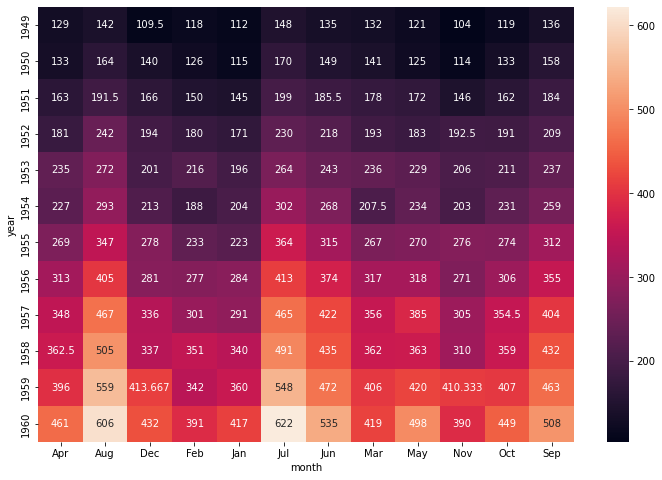

In [74]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=Airlines,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

<AxesSubplot:xlabel='year', ylabel='Passengers'>

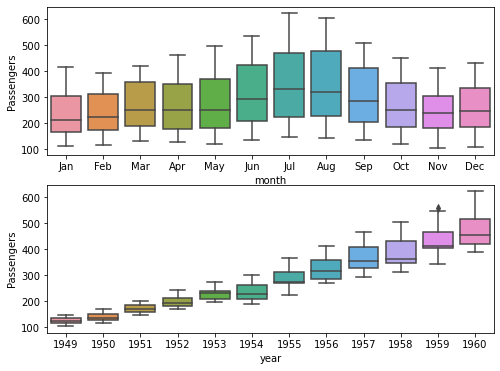

In [75]:
# Boxplot 
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data= Airlines)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=Airlines)

<AxesSubplot:xlabel='year', ylabel='Passengers'>

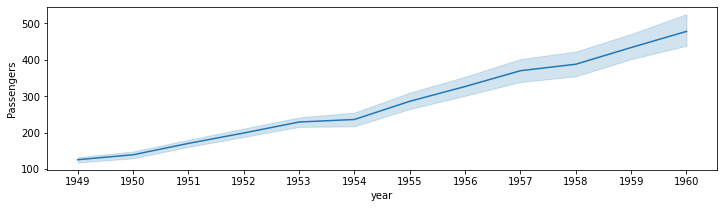

In [76]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=Airlines)

In [78]:
Train = Airlines.head(119) # training data
Test = Airlines.tail(25) # test Data

In [79]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

71.96574412780106

In [80]:
#Exponential
Exp = smf.ols('log_passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

82.32843083940466

In [81]:
#Quadratic 

Quad = smf.ols('Passengers~t+t_sq',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_sq"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

69.29893924316724

In [82]:
#Additive seasonality 

add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

211.60435093195346

In [83]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Passengers~t+t_sq+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_sq']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

41.11098660662892

In [84]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

227.893020681318

In [85]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

52.1205884242833

In [86]:
#Compareing the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,41.110987
6,rmse_Mult_add_sea,52.120588
2,rmse_Quad,69.298939
0,rmse_linear,71.965744
1,rmse_Exp,82.328431
3,rmse_add_sea,211.604351
5,rmse_Mult_sea,227.893021
